In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
data = sns.load_dataset('iris')

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [6]:
pre_process = LabelEncoder()
y_train = pre_process.fit_transform(y_train)
y_test = pre_process.transform(y_test)

In [8]:
pre_process.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.4, 0.9166666666666666, 'petal_length <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = setosa'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'petal_width <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = versicolor'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'petal_length <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = versicolor'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = versicolor'),
 Text(0.3, 0.4166666666666667, 'sepal_length <= 6.15\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.2, 0.25, 'sepal_width <= 2.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples

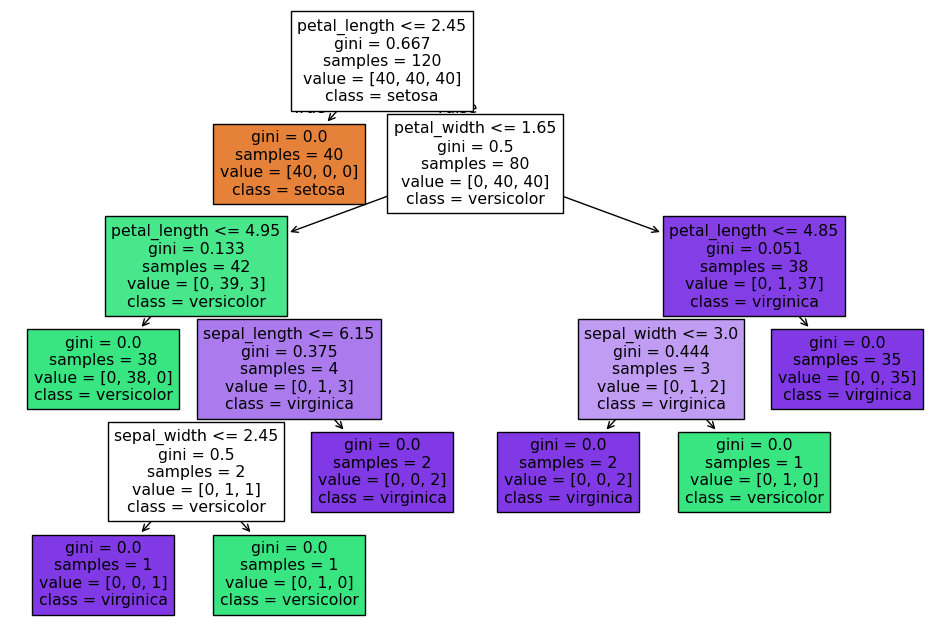

In [10]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=["setosa","versicolor","virginica"])

In [11]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [12]:
ccp_alphas

array([0.        , 0.00625   , 0.00811404, 0.03392857, 0.27067669,
       0.33333333])

In [13]:
impurities

array([0.        , 0.0125    , 0.02872807, 0.06265664, 0.33333333,
       0.66666667])

In [14]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [18]:
from sklearn.metrics import accuracy_score
test_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]
best_index = test_scores.index(max(test_scores))
ccp_best = ccp_alphas[best_index]

In [16]:
test_scores

[0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.6666666666666666,
 0.3333333333333333]

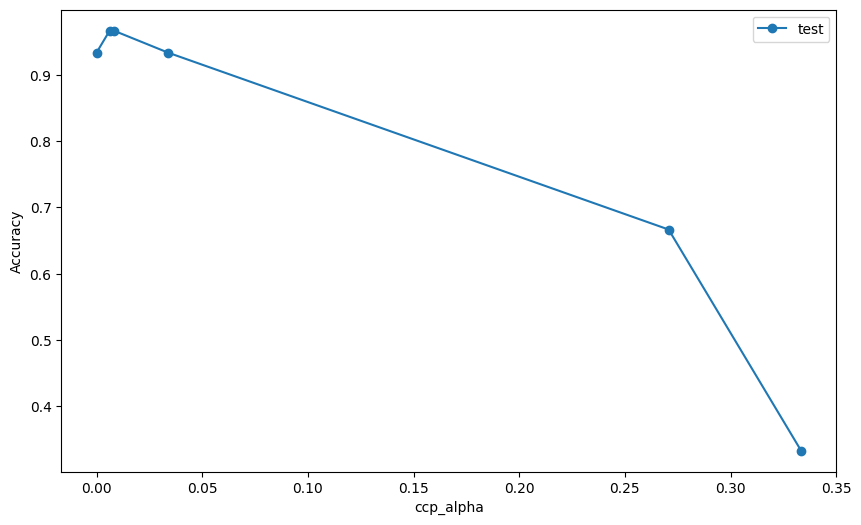

In [21]:
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, test_scores, marker='o', label='test')
plt.xlabel('ccp_alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[Text(0.375, 0.9, 'petal_length <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = setosa'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.8, 'True  '),
 Text(0.5, 0.7, 'petal_width <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = versicolor'),
 Text(0.4375, 0.8, '  False'),
 Text(0.25, 0.5, 'petal_length <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]\nclass = versicolor'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = versicolor'),
 Text(0.375, 0.3, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.75, 0.5, 'petal_length <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]\nclass = virginica'),
 Text(0.625, 0.3, 'sepal_width <= 3.0\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]

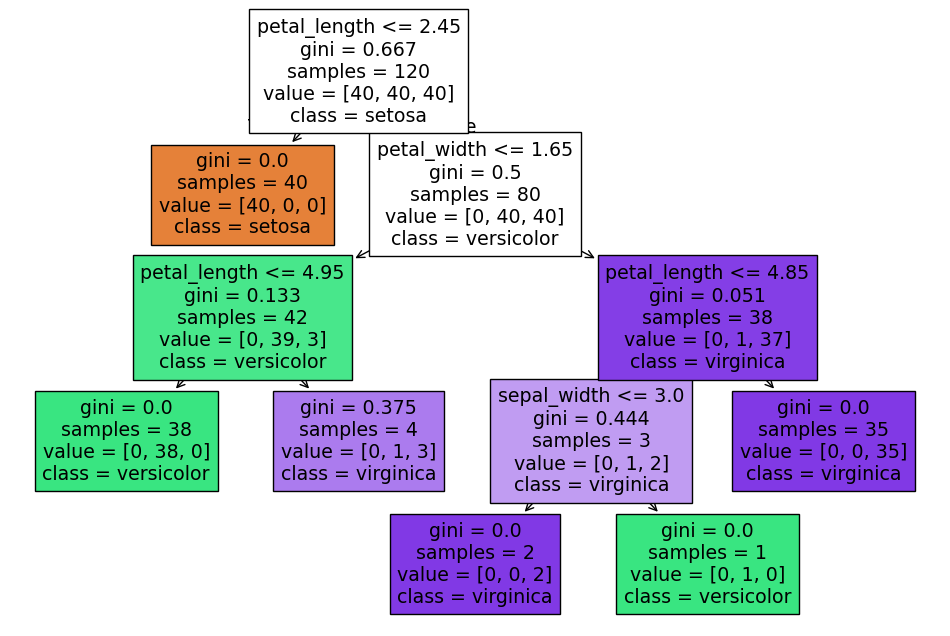

In [20]:
best_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_best)
best_clf.fit(X_train, y_train)
plt.figure(figsize=(12,8))
tree.plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=pre_process.classes_)